### Importing Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<br>

#### Importing Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

#### Checking Missing Values

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Visualize the Distribution of Features

<function matplotlib.pyplot.show(*args, **kw)>

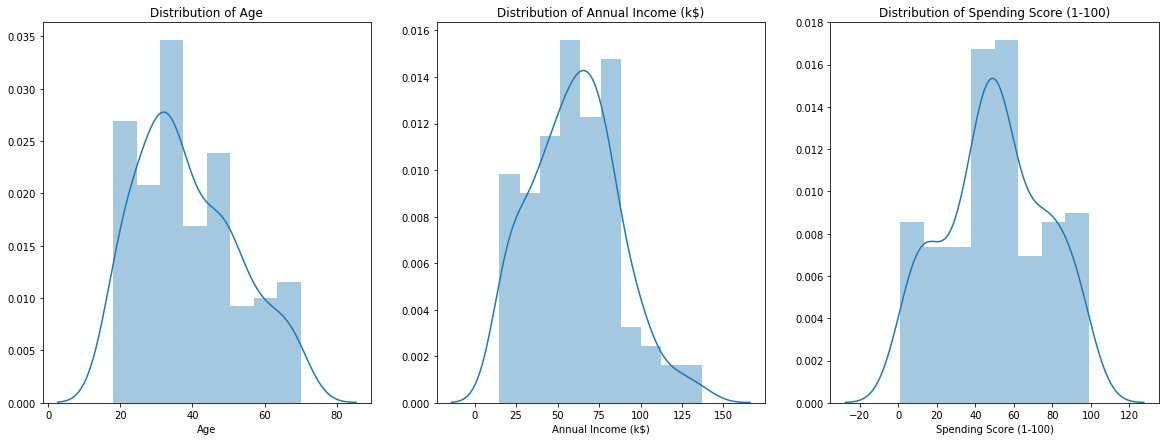

In [7]:
plt.figure(figsize=(20,7))
n = 0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    sns.distplot(df[x])
    plt.title('Distribution of {}'.format(x))
plt.show

#### Determine the correlation between features

<function matplotlib.pyplot.show(*args, **kw)>

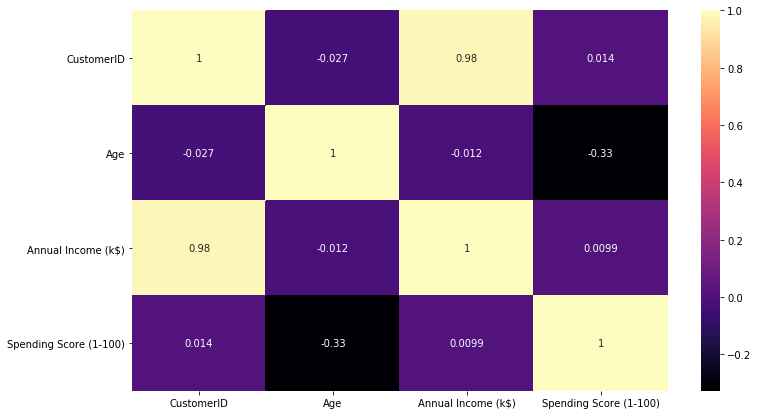

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='magma')
plt.show

### Customer Segmentation Using K-Means Algorithm

In [9]:
from sklearn.cluster import KMeans


Segmentation base on Annual Income and Spending score

In [10]:
i = df.iloc[:,[3,4]].values


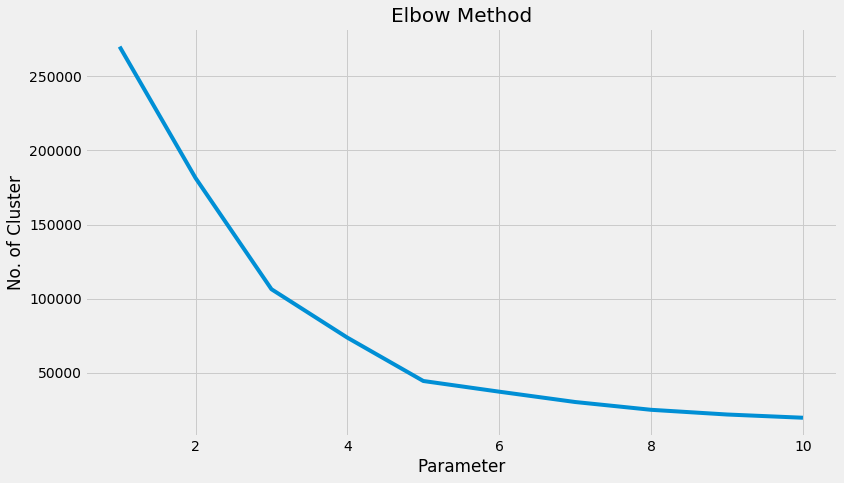

In [27]:
params = []
for x in range (1,11):
    km = KMeans(n_clusters = x, init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(i)
    params.append(km.inertia_)
plt.figure(figsize=(12,7))
plt.plot(range(1,11),params)
plt.title('Elbow Method',fontsize=20)
plt.xlabel('Parameter')
plt.ylabel('No. of Cluster')
plt.show()

As we can see from  the elbow method there are 5 diffrent cluster

In [12]:
kmCluster = KMeans(n_clusters = 5, init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means = kmCluster.fit_predict(i)
y_means
    

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

#### Visualize The Cluster

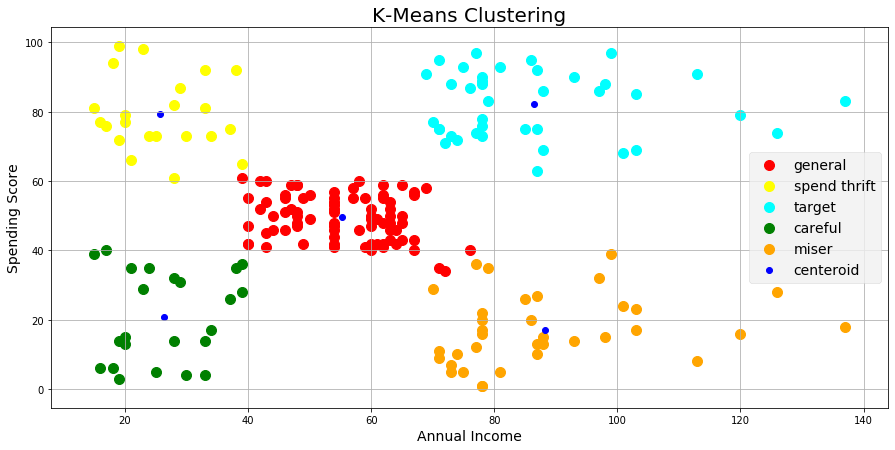

In [13]:
plt.figure(figsize=(15,7))
plt.scatter(i[y_means == 0, 0], i[y_means == 0, 1], s = 100, c = 'red', label = 'general')
plt.scatter(i[y_means == 1, 0], i[y_means == 1, 1], s = 100, c = 'yellow', label = 'spend thrift')
plt.scatter(i[y_means == 2, 0], i[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(i[y_means == 3, 0], i[y_means == 3, 1], s = 100, c = 'green', label = 'careful')
plt.scatter(i[y_means == 4, 0], i[y_means == 4, 1], s = 100, c = 'orange', label = 'miser')
plt.scatter(kmCluster.cluster_centers_[:,0], kmCluster.cluster_centers_[:, 1], c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K-Means Clustering', fontsize = 20)
plt.xlabel('Annual Income',fontsize=14)
plt.ylabel('Spending Score',fontsize=14)
plt.legend()
plt.grid()
plt.show()

Segmentation base on Age and Spending Score

In [14]:
b = df.iloc[:,[2,4]].values

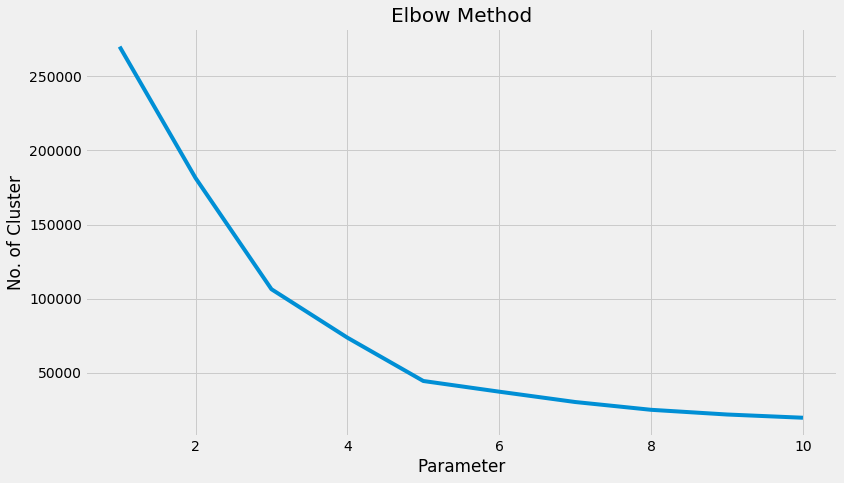

In [26]:
params_2 = []
for p in range (1,11):
    km = KMeans(n_clusters = p, init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(b)
    params_2.append(km.inertia_)
plt.figure(figsize=(12,7))
plt.plot(range(1,11),params)
plt.title('Elbow Method',fontsize=20)
plt.xlabel('Parameter')
plt.ylabel('No. of Cluster')
plt.show()

As we can see fro the elbow method, there are 4 diffrent cluster

In [16]:
kmCluster_2 = KMeans(n_clusters = 4, init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means_2 = kmCluster_2.fit_predict(b)
y_means_2

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0,
       2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

### Visualize the Cluster

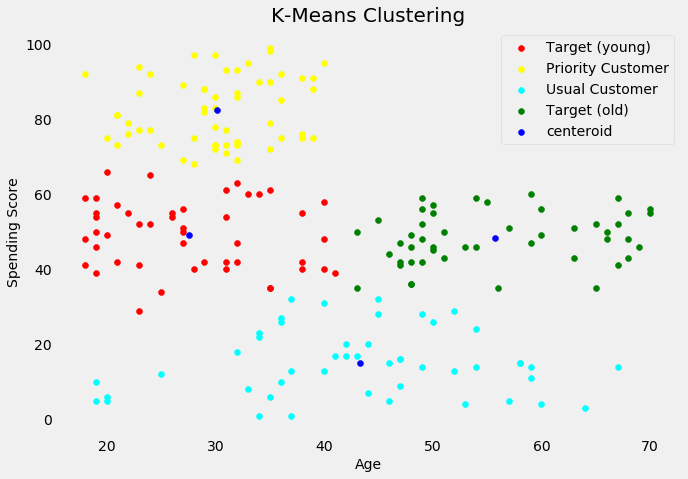

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(b[y_means_2 == 0, 0], b[y_means_2 == 0, 1], c = 'red', label = 'Target (young)')
plt.scatter(b[y_means_2 == 1, 0], b[y_means_2 == 1, 1], c = 'yellow', label = 'Priority Customer')
plt.scatter(b[y_means_2 == 2, 0], b[y_means_2 == 2, 1], c = 'cyan', label = 'Usual Customer')
plt.scatter(b[y_means_2 == 3, 0], b[y_means_2 == 3, 1], c = 'green', label = 'Target (old)')
plt.scatter(kmCluster_2.cluster_centers_[:,0], kmCluster_2.cluster_centers_[:, 1], c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K-Means Clustering', fontsize = 20)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Spending Score',fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [18]:
df['Age Cluster'] = y_means_2
df['Annual Income Cluster'] = y_means


In [24]:
df['Age Cluster'].replace(0,'Target (young)',inplace=True)
df['Age Cluster'].replace(1,'Priority Customer',inplace=True)
df['Age Cluster'].replace(2,'Usual Customer',inplace=True)
df['Age Cluster'].replace(3,'Target (old)',inplace=True)

df['Annual Income Cluster'].replace(0,'General',inplace=True)
df['Annual Income Cluster'].replace(1,'Spend Thrift',inplace=True)
df['Annual Income Cluster'].replace(2,'Target',inplace=True)
df['Annual Income Cluster'].replace(3,'Careful',inplace=True)
df['Annual Income Cluster'].replace(4,'Saver',inplace=True)





In [25]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Cluster,Annual Income Cluster
0,1,Male,19,15,39,Target (young),Careful
1,2,Male,21,15,81,Priority Customer,Spend Thrift
2,3,Female,20,16,6,Usual Customer,Careful
3,4,Female,23,16,77,Priority Customer,Spend Thrift
4,5,Female,31,17,40,Target (young),Careful
